# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Fabian Aulia Permana
- **Email:** Permana.aulia00@gmail.com
- **ID Dicoding:** kampfkatzen

## Menentukan Pertanyaan Bisnis

- Pada kondisi cuaca dan musim apa sepeda terpinjam paling banyak dan paling sedikit?
- Berapa total peminjaman casual dan registered pada bulan september 2011?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

##### load day dataset

In [2]:
day = pd.read_csv('data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### load hour dataset

In [3]:
hour = pd.read_csv('data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### List kolom:

1. instant: indeks
2. dteday : tanggal peminjaman sepeda
3. season : 1 adalah musim dingin, 2 adalah musim semi, 3 adalah musim panas, dan 4 adalah musim gugur pada peminjaman sepeda
4. yr : 0 adalah 2011, 1 adalah 2012
5. mnth : bulan, dari ke-1 sampai ke-12
6. hr : jam, dari ke-0 sampai ke-23
7. holiday :  indikator hari libur, jika hari libur maka nilainya 1, jika tidak maka nilainya 0
8. weekday : hari pada satu pekan
9. workingday : indikator hari kerja, jika hari kerja maka nilainya 1, jika tidak maka nilainya 0
10. weathersit : situasi cuaca peminjaman sepeda dilakukan. 1 adalah Cerah, 2 adalah Mendung, 3 adalah Hujan atau bersalju ringan, 4 adalah Hujan Lebat
11. temp : suhu dalam derajat Celsius pada saat peminjaman sepeda dilakukan
12. atemp: suhu yang dirasakan dalam derajat Celsius pada saat peminjaman sepeda dilakukan
13. hum: Kelembapan
14. windspeed: Kecepatan angin
15. casual: jumlah peminjam sepeda biasa
16. registered: jumlah peminjam sepeda yang terdaftar member
17. cnt: total jumlah peminjam sepeda, campuran dari jumlah casual dan registered

### Assessing Data

##### day dataframe

mengecek shape pada data day

In [4]:
rows, columns = day.shape
print(f'Rows: {rows}, Columns: {columns}')

Rows: 731, Columns: 16


mengecek informasi pada data day

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


pada data day, terdapat kesalahan tipe data pada kolom dteday

mengecek missing value pada data day

In [6]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

pada data day, tidak ada missing value di semua kolom

mengecek duplikasi data pada data day

In [7]:
day.duplicated().sum()

np.int64(0)

pada data day, tidak ada data duplikat

mengecek jumlah data unik pada setiap field data day

In [8]:
day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

mengecek nilai statistik deskriptif pada data day

In [9]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### hour dataframe

mengecek shape pada data hour

In [10]:
rows, columns = hour.shape
print(f'Rows: {rows}, Columns: {columns}')

Rows: 17379, Columns: 17


mengecek informasi pada data hour

In [11]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


pada data hour, terdapat kesalahan tipe data pada kolom dteday

mengecek missing value pada data hour

In [12]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

pada data hour, tidak ada missing value di semua kolom

mengecek data duplikat pada data hour

In [13]:
hour.duplicated().sum()

np.int64(0)

pada data hour, tidak ada data duplikat

mengecek jumlah data unik pada data hour

In [14]:
hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

mengecek nilai statistik deskriptif dari data hour

In [15]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Data assessment:

- Kesalahan tipe data pada kolom dteday di data hour dan data day

### Cleaning Data

#### Handling data type error

##### day data

In [16]:
day['dteday'] = pd.to_datetime(day['dteday'])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### hour data

In [17]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Cleaning result:

- data type kolom dteday pada data day dan data hour berubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore data day dan data hour

##### Mencari count, mean, min, interquartil 1/2/3, max, dan standard deviation pada data day

In [18]:
day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


##### Mencari count, mean, min, interquartil 1/2/3, max, dan standard deviation pada data hour

In [19]:
hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


##### Mencari max, min, mean, dan standard deviation pada count peminjaman berdasarkan situasi cuaca

In [20]:
hour.groupby(by="weathersit").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
           nunique  max min        mean         std
weathersit                                         
1              700  977   1  204.869272  189.487773
2              567  957   1  175.165493  165.431589
3              300  891   1  111.579281  133.781045
4                3  164  23   74.333333   77.925178

##### Mencari max, min, mean, dan standard deviation pada count peminjaman berdasarkan musim

In [21]:
hour.groupby(by="season").agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

dteday  cnt                            
       nunique  max min        mean         std
season                                         
1          181  801   1  111.114569  119.224010
2          184  957   1  208.344069  188.362473
3          188  977   1  236.016237  197.711630
4          178  967   1  198.868856  182.967972

### Insights peminjaman sepeda selama setahun:

- Jumlah sepeda terpinjam paling sedikit dalam *sehari* adalah **22** dan terbanyak adalah  **8714**
- Jumlah sepeda terpinjam paling sedikit dalam *sejam* adalah **1** dan terbanyak adalah **977**
- mean dari jumlah sepeda terpinjam paling banyak dalam *sejam* ada pada saat **musim gugur** dan paling sedikit pada saat **musim semi**
- mean dari jumlah sepeda terpinjam paling banyak dalam *sejam* ada pada saat **cuaca cerah** dan paling sedikit pada saat **cuaca mendung, hujan/bersalju ringan, dan hujan lebat.**

## Visualization & Explanatory Analysis

Konversi data main yang berisikan salinan dari data hour ke format baru untuk visualisasi data

In [22]:
main_data = hour.copy()
weathersit = {1:'Clear', 2: 'Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain'}
season = {1:'Spring', 2: 'Summer', 3:'Autumn', 4:'Winter'}
yr = {0: '2011', 1: '2012'}
mnth = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
#mapping
main_data['weathersit'] = main_data['weathersit'].map(weathersit)
main_data['season'] = main_data['season'].map(season)
main_data['mnth'] = main_data['mnth'].map(mnth)
main_data['weekday'] = main_data['dteday'].dt.day_name()
main_data['yr'] = main_data['yr'].map(yr)

main_data = main_data[['dteday', 'yr', 'mnth', 'hr', 'weekday', 'season', 'weathersit','cnt', 'registered', 'casual']]

main_data.head()

,dteday,yr,mnth,hr,weekday,season,weathersit,cnt,registered,casual
0,2011-01-01,2011,January,0,Saturday,Spring,Clear,16,13,3
1,2011-01-01,2011,January,1,Saturday,Spring,Clear,40,32,8
2,2011-01-01,2011,January,2,Saturday,Spring,Clear,32,27,5
3,2011-01-01,2011,January,3,Saturday,Spring,Clear,13,10,3
4,2011-01-01,2011,January,4,Saturday,Spring,Clear,1,1,0


In [23]:
rows, columns = main_data.shape
print(f'Rows: {rows}, Columns: {columns}')

Rows: 17379, Columns: 10


### Pertanyaan 1:

##### Pada kondisi cuaca dan musim apa sepeda terpinjam paling banyak dan paling sedikit?

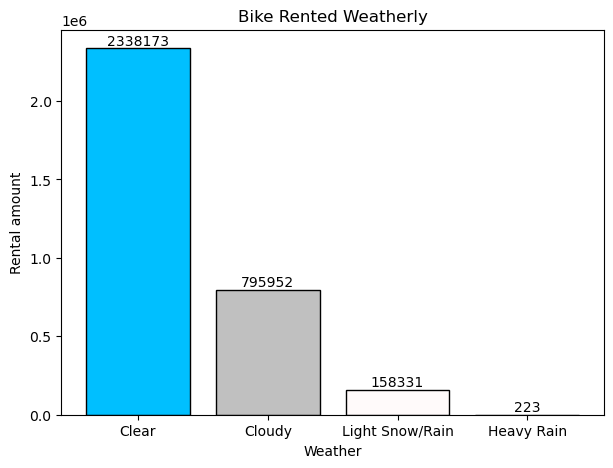

In [24]:
weathery_amounts = main_data.groupby('weathersit').cnt.sum().sort_values(ascending=False)
sizes = weathery_amounts.values
labels = weathery_amounts.index
weather_color = {'Clear': 'deepskyblue','Cloudy': 'silver','Light Snow/Rain': 'snow','Heavy Rain': 'gray'}
colors = [weather_color[label] for label in labels]

plt.figure(figsize=(7, 5))
plt.bar(labels, sizes, color=colors, edgecolor='black')

plt.title('Bike Rented Weatherly')
plt.xlabel('Weather')
plt.ylabel('Rental amount')
for i, value in enumerate(sizes):
    plt.text(i, value + 500, str(value), ha='center', va='bottom')
plt.show()

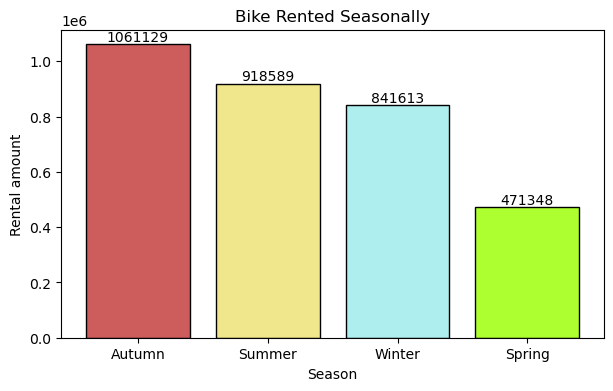

In [25]:
seasonal_amounts = main_data.groupby('season').cnt.sum().sort_values(ascending=False)
sizes = seasonal_amounts.values
labels = seasonal_amounts.index
season_color = {'Winter': 'paleturquoise','Spring': 'greenyellow','Summer': 'khaki','Autumn': 'indianred'}
colors = [season_color[label] for label in labels]

plt.figure(figsize=(7, 4))
plt.bar(labels, sizes, color=colors, edgecolor='black')

plt.title('Bike Rented Seasonally')
plt.xlabel('Season')
plt.ylabel('Rental amount')
for i, value in enumerate(sizes):
    plt.text(i, value + 500, str(value), ha='center', va='bottom')
plt.show()

### Pertanyaan 2:

##### Berapa total peminjaman casual dan registered pada bulan september 2011?

Filter main_data untuk memenuhi kondisi pertanyaan 2

In [26]:
registered, casual = main_data[(main_data['yr'] == '2011') & (main_data['mnth'] == 'September')][['registered', 'casual']].sum()
print('Total peminjaman registered pada bulan september 2011: ', registered)
print('Total peminjaman casual pada bulan september 2011: ', casual)

Total peminjaman registered pada bulan september 2011:  100873
Total peminjaman casual pada bulan september 2011:  26545


## Conclusion

- **Cuara cerah** adalah kondisi cuaca dengan jumlah peminjaman tertinggi dibanding kondisi cuaca lainnya, dan **musim gugur** adalah musim yang performa peminjamannya tertinggi diantara musim lain
- Pada bulan september 2011, peminjaman registered berjumlah **100873**, dan peminjaman casual berjumlah: **26545**

In [28]:
# main_data.to_csv("dashboard/main_data.csv", index=False)